<a href="https://colab.research.google.com/github/SureshTakasi/DATA602-ML-UMBC/blob/main/Data_602_Project_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis Amazon Reviews



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import os
import gzip
import datetime as dt
import seaborn as sns
sns.set()

In [ ]:
"""
We will ignore FutureWarning and DeprecationWarning
"""
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
 
"""
We will ignore warnings
"""
warnings.filterwarnings("ignore")
 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
program_start_time=time.time()

In [ ]:
!wget https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz

--2020-11-11 20:35:34--  https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.105.85
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.105.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22870508 (22M) [application/x-gzip]
Saving to: ‘amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz’

amazon_reviews_us_M 100%[===================>]  21.81M  18.0MB/s    in 1.2s    

2020-11-11 20:35:36 (18.0 MB/s) - ‘amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz’ saved [22870508/22870508]



In [ ]:
import gzip
with gzip.open('amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz') as f:
    df = pd.read_csv(f, sep='\t', error_bad_lines=False)
 
df.head()

b'Skipping line 35246: expected 15 fields, saw 22\n'
b'Skipping line 87073: expected 15 fields, saw 22\n'


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,2015-08-31
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4.0,0.0,0.0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31


In [ ]:
data = df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104852 entries, 0 to 104851
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   marketplace        104852 non-null  object 
 1   customer_id        104852 non-null  int64  
 2   review_id          104852 non-null  object 
 3   product_id         104852 non-null  object 
 4   product_parent     104852 non-null  int64  
 5   product_title      104852 non-null  object 
 6   product_category   104852 non-null  object 
 7   star_rating        104850 non-null  float64
 8   helpful_votes      104850 non-null  float64
 9   total_votes        104850 non-null  float64
 10  vine               104850 non-null  object 
 11  verified_purchase  104850 non-null  object 
 12  review_headline    104848 non-null  object 
 13  review_body        104849 non-null  object 
 14  review_date        104850 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1

In [ ]:
data.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          2
helpful_votes        2
total_votes          2
vine                 2
verified_purchase    2
review_headline      4
review_body          3
review_date          2
dtype: int64

In [ ]:
data = data.dropna(axis = 0, how ='any')

In [ ]:
data.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

In [ ]:
data.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,1.048470e+05,1.048470e+05,104847.000000,104847.000000,104847.000000
mean,2.793730e+07,5.015301e+08,3.763160,1.244032,1.615440
std,1.508714e+07,2.871676e+08,1.523537,7.070485,7.910005
min,1.007100e+04,5.352400e+04,1.000000,0.000000,0.000000
25%,1.471380e+07,2.593731e+08,3.000000,0.000000,0.000000
50%,2.650319e+07,4.939016e+08,4.000000,0.000000,0.000000
75%,4.223490e+07,7.440083e+08,5.000000,1.000000,1.000000
max,5.309657e+07,9.999508e+08,5.000000,769.000000,791.000000


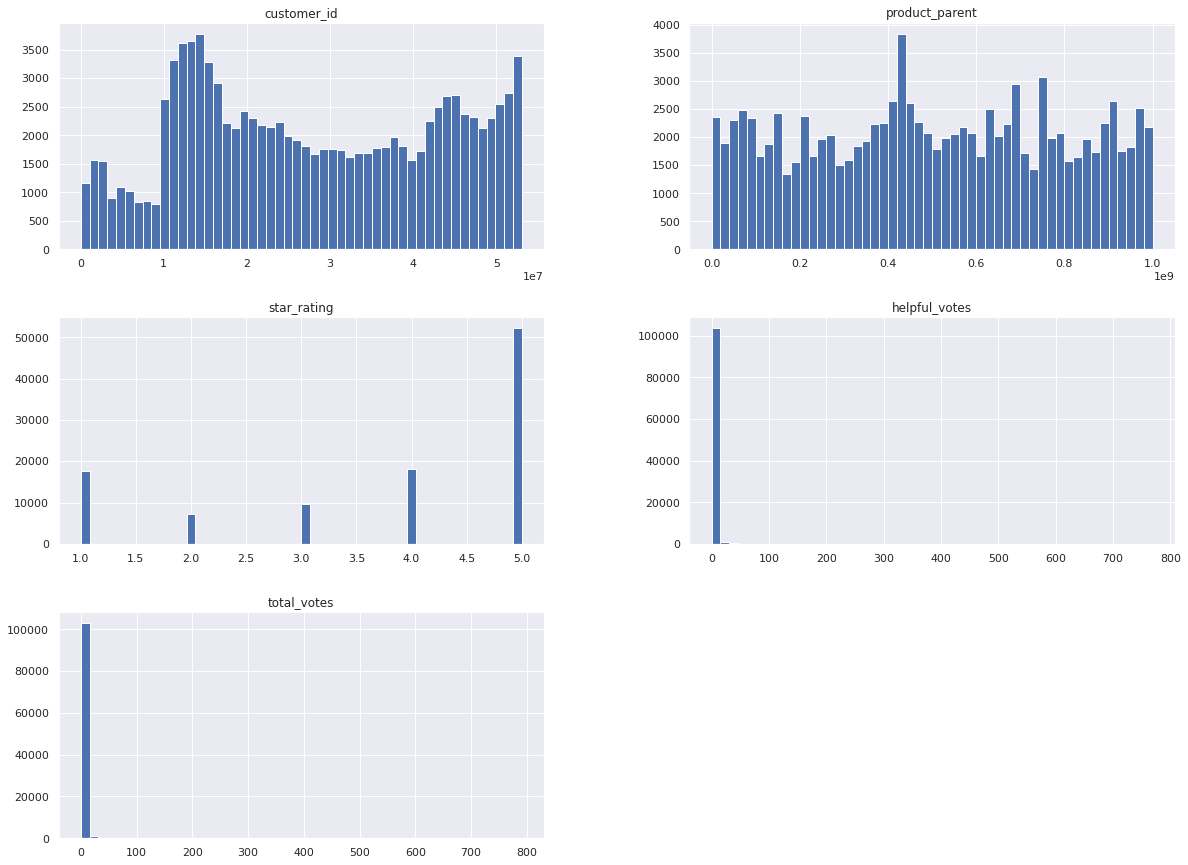

In [ ]:
# Builds histogram and set the number of bins and fig size (width, height)
data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Converting review_date to datetime object to extract month, day & year
data['review_date'] =  pd.to_datetime(data['review_date'], format='%Y-%m-%d')

In [ ]:
# Extracting month, day and year
data['day'] = data['review_date'].apply(lambda r:r.day)
data['month'] = data['review_date'].apply(lambda r:r.month)
data['year'] = data['review_date'].apply(lambda r:r.year)

In [ ]:
data.head(2)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,day,month,year
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31,31,8,2015
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,2015-08-31,31,8,2015


## Overall rating Distribution

In [ ]:
data['star_rating'].value_counts()

5.0    52196
4.0    18063
1.0    17571
3.0     9719
2.0     7298
Name: star_rating, dtype: int64

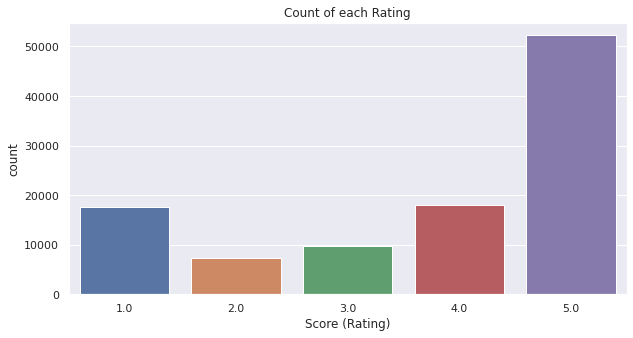

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='star_rating', data=data, )
plt.xlabel('Score (Rating)')
plt.title('Count of each Rating')
plt.show()

## Trend over time

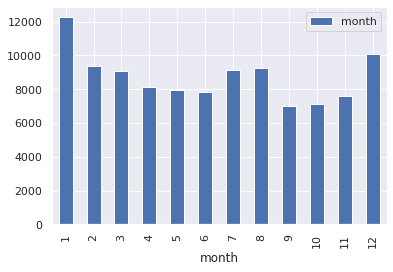

In [ ]:
monthly_reviews = pd.DataFrame(data.groupby(['month'])['month'].count())
monthly_reviews.head()
monthly_reviews.plot(kind='bar')

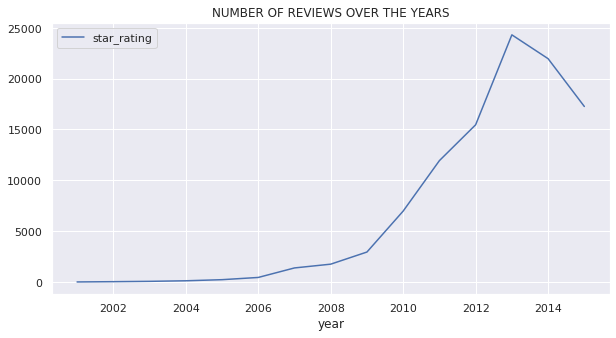

In [ ]:
yearly = data.groupby(['year'])['star_rating'].count().reset_index()
yearly.head()

yearly.plot(x="year",y="star_rating",kind="line",title="NUMBER OF REVIEWS OVER THE YEARS", figsize = (10,5))
plt.show()

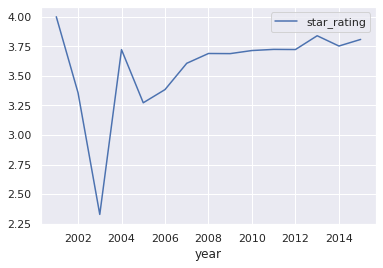

In [ ]:
yearly_avg_rating=data.groupby(['year'])['star_rating'].mean().reset_index()
  
yearly_avg_rating.plot(x = 'year', y = 'star_rating')

##Reviews per product

In [ ]:
counts = data["product_id"].value_counts().to_frame()
counts.head()  

,product_id
B00J46XO9U,1078
B004911E9M,730
B002D4IHYM,690
B00E5PI594,615
B005S1CYO6,599


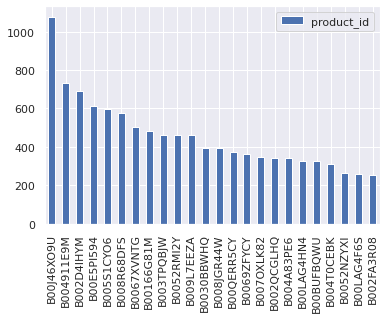

In [ ]:
counts.loc[counts['product_id'] > 250].plot(kind='bar')

## Average Rating

In [ ]:
avg_rating = data.groupby("product_id")["star_rating"].mean().to_frame()
avg_rating.head()

,star_rating
product_id,
0528007262,3.615385
0594012015,3.120000
0594450187,5.000000
0594450209,5.000000
0594450306,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f087836ef28>]],
      dtype=object)

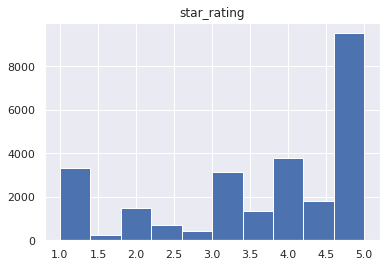

In [ ]:
avg_rating.hist()

In [ ]:
table = counts.join(avg_rating)
table.head(5)

,product_id,star_rating
B00J46XO9U,1078,4.376623
B004911E9M,730,2.427397
B002D4IHYM,690,4.530435
B00E5PI594,615,3.598374
B005S1CYO6,599,2.722871


,product_id,star_rating
product_id,1.000000,0.015261
star_rating,0.015261,1.000000


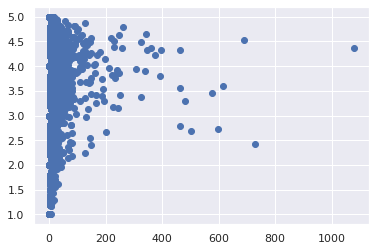

In [ ]:
plt.scatter("product_id", "star_rating", data=table)
table.corr()



In [ ]:
pos_vs_neg_vs_neutral = pd.DataFrame(data.groupby(data['star_rating'].apply(lambda x: 'negative' if x < 3 else 'positive' if x > 3 else 'neutral'))['star_rating'].count())
pos_vs_neg_vs_neutral.rename(columns = {'star_rating':'count'}, inplace = True) 
pos_vs_neg_vs_neutral

,count
star_rating,
negative,24869
neutral,9719
positive,70259


<Figure size 720x360 with 0 Axes>

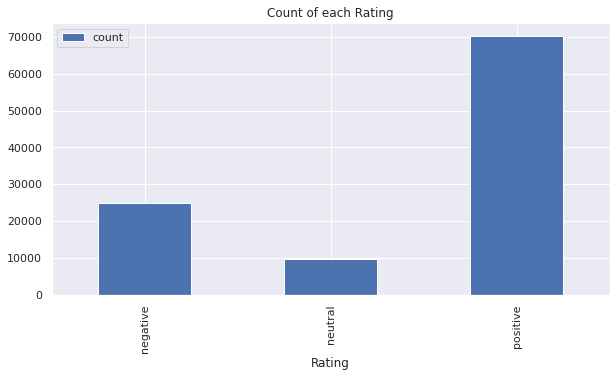

In [ ]:
plt.figure(figsize = (10,5))
pos_vs_neg_vs_neutral.plot(kind = 'bar', figsize = (10,5))
plt.xlabel('Rating')
plt.title('Count of each Rating')
plt.show()

## Review Helpfulness

In [ ]:
helpfulness=data[['helpful_votes','total_votes']]
helpfulness['helpful_votes']=helpfulness['helpful_votes'].astype(float)
helpfulness['total_votes']=helpfulness['total_votes'].astype(float)
helpfulness

,helpful_votes,total_votes
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
104847,23.0,27.0
104848,10.0,11.0
104849,13.0,13.0
104850,58.0,61.0


## Calculating Helpfulness Percentage and replacing Nan with 0


In [ ]:
helpfulness['percentage']=(helpfulness['helpful_votes']/helpfulness['total_votes'])*100
helpfulness=helpfulness.fillna(0)

## Creating an Interval of 10 for percentage Value.

In [ ]:
result_helpfulness=helpfulness.groupby(pd.cut(helpfulness.percentage,np.arange(0, 101, 10))).count()
result_helpfulness=result_helpfulness.rename(columns={'percentage':'Count'})
#result_Helpfulness=result_helpfulness.reset_index()
result_helpfulness

,helpful_votes,total_votes,Count
percentage,,,
"(0, 10]",100,100,100
"(10, 20]",329,329,329
"(20, 30]",307,307,307
"(30, 40]",884,884,884
"(40, 50]",3150,3150,3150
"(50, 60]",451,451,451
"(60, 70]",1655,1655,1655
"(70, 80]",1812,1812,1812
"(80, 90]",1443,1443,1443


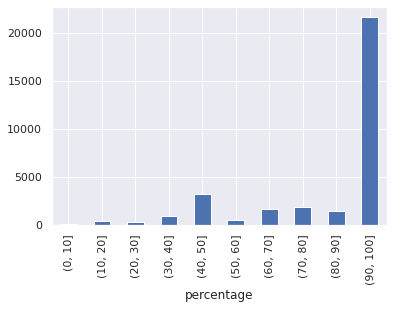

In [ ]:
result_helpfulness['helpful_votes'].plot(kind='bar')

# Distribution of Length of reviews on Amazon

In [ ]:
data['review_body'].astype(str)

data["review_body"].fillna("NA", inplace = True) 

In [ ]:
review_length=data[['review_id','review_headline','review_body']]

In [ ]:
review_length['word_length']=review_length['review_body'].apply(lambda x: len(x.split()))

In [ ]:
review_length['character_length']=review_length['review_body'].apply(lambda x: len(x))

In [ ]:
review_length.head()

,review_id,review_headline,review_body,word_length,character_length
0,R8MEA6IGAHO0B,Very Happy!,"As advertised. Everything works perfectly, I'm...",26,139
1,R31LOQ8JGLPRLK,five star,it's great,2,10
2,R2Y0MM9YE6OP3P,great cables,These work great and fit my life proof case fo...,13,60
3,RRB9C05HDOD4O,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,20,101
4,R26I2RI1GFV8QG,Cameras has battery issues,"Be careful with these products, I have bought ...",24,141


## Creating an Interval of 100 for Charcters and Words Value.



In [ ]:
## Code to be written ##

## Rating vs Helpfulness

In [ ]:
rating_vs_helpfulness=data[['review_id','star_rating','helpful_votes','total_votes']]

In [ ]:
rating_vs_helpfulness['helpful_votes']=rating_vs_helpfulness['helpful_votes'].astype(float)

In [ ]:
rating_vs_helpfulness['total_votes']=rating_vs_helpfulness['total_votes'].astype(float)

In [ ]:
rating_vs_helpfulness['percentage']=(rating_vs_helpfulness['helpful_votes']/rating_vs_helpfulness['total_votes'])*100

In [ ]:
rating_vs_helpfulness=rating_vs_helpfulness.fillna(0)
rating_vs_helpfulness.head()

,review_id,star_rating,helpful_votes,total_votes,percentage
0,R8MEA6IGAHO0B,5.0,0.0,0.0,0.0
1,R31LOQ8JGLPRLK,5.0,0.0,1.0,0.0
2,R2Y0MM9YE6OP3P,5.0,0.0,0.0,0.0
3,RRB9C05HDOD4O,4.0,0.0,0.0,0.0
4,R26I2RI1GFV8QG,2.0,0.0,0.0,0.0


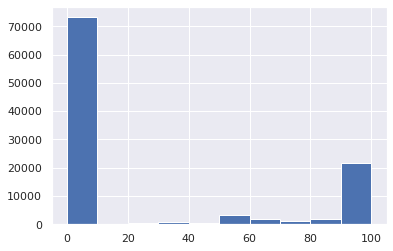

In [ ]:
rating_vs_helpfulness['percentage'].hist()

In [ ]:
avg_rating = data.groupby("product_id")["star_rating", "helpful_votes"].mean()
avg_rating.head()

,star_rating,helpful_votes
product_id,,
0528007262,3.615385,0.0
0594012015,3.120000,0.8
0594450187,5.000000,0.5
0594450209,5.000000,0.0
0594450306,5.000000,0.0


## Avg Rating vs Avg helpfulness

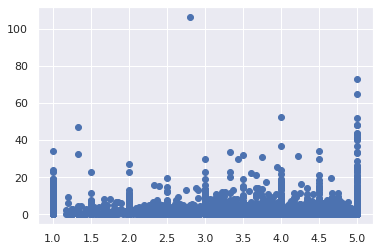

In [ ]:
plt.scatter(x=avg_rating['star_rating'], y=avg_rating['helpful_votes'])
plt.show()

## Avg helpfulness vs avg length of review

In [ ]:
helpfulness_vs_review_length=data[['review_id','product_id','helpful_votes']]
helpfulness_vs_review_length = helpfulness_vs_review_length.join(review_length['word_length'])
helpfulness_vs_review_length.head()



,review_id,product_id,helpful_votes,word_length
0,R8MEA6IGAHO0B,B00MC4CED8,0.0,26
1,R31LOQ8JGLPRLK,B00OQMFG1Q,0.0,2
2,R2Y0MM9YE6OP3P,B00QERR5CY,0.0,13
3,RRB9C05HDOD4O,B00QUFTPV4,0.0,20
4,R26I2RI1GFV8QG,B0067XVNTG,0.0,24


In [ ]:
helpfulness_vs_review_length_grpby = helpfulness_vs_review_length.groupby("product_id")["helpful_votes", 'word_length'].mean()
helpfulness_vs_review_length_grpby.head()



,helpful_votes,word_length
product_id,,
0528007262,0.0,25.153846
0594012015,0.8,13.880000
0594450187,0.5,13.500000
0594450209,0.0,22.333333
0594450306,0.0,2.000000


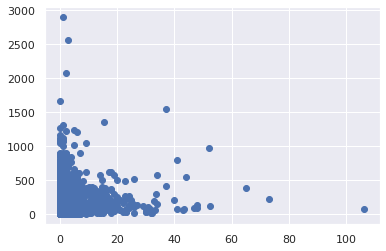

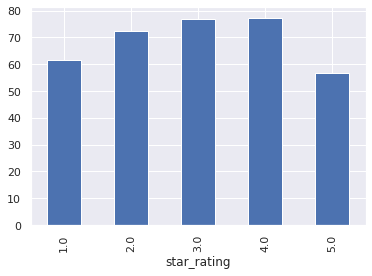

In [ ]:
plt.scatter(data = helpfulness_vs_review_length_grpby, x = 'helpful_votes', y = 'word_length')
plt.show()    

# product rating vs review length
rating_vs_review_length = data[['star_rating']].join(review_length['word_length'])
rating_vs_review_length.groupby(['star_rating'])['word_length'].mean().plot(kind='bar')



In [ ]:
cols = ['star_rating','helpful_votes', 'total_votes']
data[cols] = data[cols].astype('Int64')
data['star_rating'].head()

0    5
1    5
2    5
3    4
4    2
Name: star_rating, dtype: Int64

In [ ]:
reviews = data[['review_headline','review_body', 'star_rating']]

In [ ]:
reviews['review'] = reviews['review_headline'].str.cat(reviews['review_body'],sep=" ")
reviews

,review_headline,review_body,star_rating,review
0,Very Happy!,"As advertised. Everything works perfectly, I'm...",5,Very Happy! As advertised. Everything works pe...
1,five star,it's great,5,five star it's great
2,great cables,These work great and fit my life proof case fo...,5,great cables These work great and fit my life ...
3,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,4,Work very well but couldn't get used to not he...
4,Cameras has battery issues,"Be careful with these products, I have bought ...",2,Cameras has battery issues Be careful with the...
...,...,...,...,...
104847,The Cat Barf is Gone!,"I've been looking for a while for the \\""purr\...",5,The Cat Barf is Gone! I've been looking for a ...
104848,Well worth [it],We live in an apartment with hardwood floors a...,5,Well worth [it] We live in an apartment with h...
104849,Its a Time saver!!!,I received this for a birthday present and Its...,5,Its a Time saver!!! I received this for a birt...
104850,Got Stains?,I got the Dirt Devil Spot Scrubber for a gift ...,5,Got Stains? I got the Dirt Devil Spot Scrubber...


In [ ]:
reviews.isna().sum()

review_headline    0
review_body        0
star_rating        0
review             0
dtype: int64

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import string

In [ ]:
def review_word_cloud(reviews):
    words = " ".join(reviews)
                 
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words)
                 
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

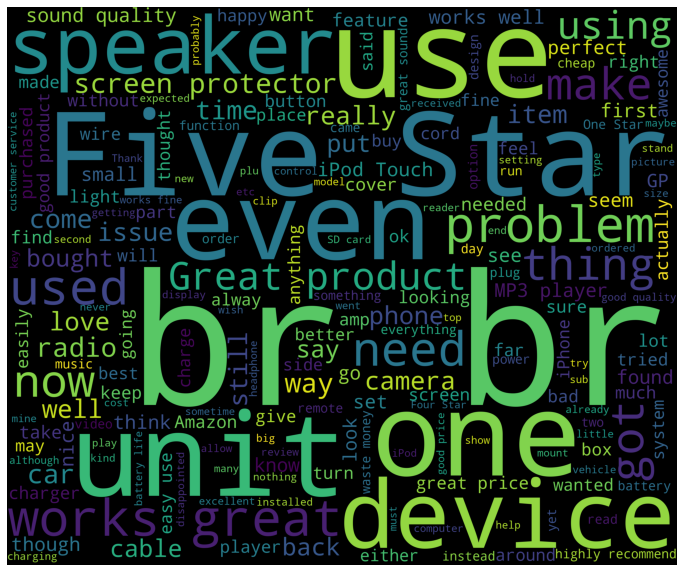

In [ ]:
review_word_cloud(reviews["review"])

In [ ]:
from bs4 import BeautifulSoup
import spacy
import re
!pip install unidecode
import unidecode

     |████████████████████████████████| 245kB 7.7MB/s 


In [ ]:
import string
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [ ]:
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r" v ", " very", phrase)
    phrase = re.sub(r'\bthats\b', 'that is', phrase)
    phrase = re.sub(r'\bive\b', 'i have', phrase)
    phrase = re.sub(r'\bim\b', 'i am', phrase)
    phrase = re.sub(r'\bya\b', 'yeah', phrase)
    phrase = re.sub(r'\bcant\b', 'can not', phrase)
    phrase = re.sub(r'\bdont\b', 'do not', phrase)
    phrase = re.sub(r'\bwont\b', 'will not', phrase)
    phrase = re.sub(r'\bid\b', 'i would', phrase)
    phrase = re.sub(r'wtf', 'what the fuck', phrase)
    phrase = re.sub(r'\bwth\b', 'what the hell', phrase)
    phrase = re.sub(r'\br\b', 'are', phrase)
    phrase = re.sub(r'\bu\b', 'you', phrase)
    phrase = re.sub(r'\bk\b', 'OK', phrase)
    phrase = re.sub(r'\bsux\b', 'sucks', phrase)
    phrase = re.sub(r'\bno+\b', 'no', phrase)
    phrase = re.sub(r'\bcoo+\b', 'cool', phrase)
    phrase = re.sub(r'rt\b', '', phrase)
    phrase = phrase.strip()
    #print("decontracted:",phrase)
    return phrase

In [ ]:
# exclude words from spacy stopwords list
deselect_stop_words = ['no', 'not']
for w in deselect_stop_words:
    nlp.vocab[w].is_stop = False
 
# exclude words from spacy stopwords list
select_stop_words = ['#']
for w in select_stop_words:
    nlp.vocab[w].is_stop = True

In [ ]:
def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    #print("strip_html_tags:", stripped_text)
    return stripped_text

In [ ]:
def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    #print("remove_accented_chars:", text)
    return text

In [ ]:
def remove_extra_characters(text):
    """remove extra characters from text, e.g. aaaaawwwweeeessssoooommmeee"""
    text = re.sub("(.)\\1{2,}", "\\1", text)
    #print("remove_extra_characters:", text)
    return text

In [ ]:
def keep_alphabet_numbers(text):
    """keep only words and numbers in the text"""
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    return text

In [ ]:
def remove_urls(text):
    """remove url from the text"""
    # remove hyperlinks
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    return text

In [ ]:
def text_preprocessing(text):
    """preprocess text with default option set to true for all steps"""
    text = strip_html_tags(text)
    text = remove_urls(text)
    #text = remove_mentions(text)
    #text = remove_whitespace(text)
    text = remove_accented_chars(text)
    text = decontracted(text)
    text = remove_extra_characters(text)
    text = keep_alphabet_numbers(text)
    text = text.lower()
    #text = remove_numeric(text)
    #text = remove_stops(text)
    #text = lemmatize(text)
    #text = correct_spelling(text)
    tokens = nlp(text)
    review_text = [word for word in tokens if not word.is_stop]
    review_text = " ".join([str(TextBlob(word.text).correct()) for word in review_text])
    review_text = [word.lemma_ for word in nlp(review_text)]
    return " ".join(review_text)

In [ ]:
text = "I didn't likeeeeeeeeeeee the prodct. davé It is of no use. As advertised I've been looing for a wile for the \\purr\\fect.... , L8 delivry.https://www.kaggle.com/michaelcwang2/topic-modeling-for-hotel-review @Bhalu, I dont recomend it at all. wth is this!! thats what I am saying. Nnsense!! what r they doing "
res = text_preprocessing(text) 
print(res)

not like product dave no use advertise look will pure feel will delivery shall not recommend hell say nonsense


In [ ]:
reviews_subset = reviews[:500]
reviews_subset.shape

(500, 4)

In [ ]:
reviews_subset['preprocessed_review'] = reviews_subset['review'].apply(lambda x: text_preprocessing(x))
reviews_subset.tail()

,review_headline,review_body,star_rating,review,preprocessed_review
495,Five Stars,Great sound weather good out side use,5,Five Stars Great sound weather good out side use,star great sound weather good use
496,Great speakers,Very clear and great speakers! Not as loud as ...,5,Great speakers Very clear and great speakers! ...,great speaker clear great speaker not loud exp...
497,Extra reach is a plus,Heavier and sturdier feel than the Apple cable...,4,Extra reach is a plus Heavier and sturdier fee...,extra reach plus heavy study feel apple table ...
498,Five Stars,Ok,5,Five Stars Ok,star ok
499,the bluetooth works great… good bargain!,Good！It's loud.. the bluetooth works great… go...,5,the bluetooth works great… good bargain! Good！...,bluetooth work great good bargain good loud bl...


In [ ]:
reviews_subset.tail(10)

,review_headline,review_body,star_rating,review,preprocessed_review
490,my 07 infiniti beats the avicu260 blindfolded ...,1. does not give the most direct route correct...,1,my 07 infiniti beats the avicu260 blindfolded ...,07 infinite beat avicu260 blindfold not recomm...
491,Five Stars,"Super Fast shipping, Item is as described, gre...",5,"Five Stars Super Fast shipping, Item is as des...",star super fast shipping item describe great t...
492,great product.,"As advertised, great product.",5,"great product. As advertised, great product.",great product advertise great product
493,Great Product,nice long cord and is a thick one too. It is ...,5,Great Product nice long cord and is a thick on...,great product nice long cord thick not go wear...
494,Sucks,"1 cord didn't even work when we got it, the ot...",1,"Sucks 1 cord didn't even work when we got it, ...",suck 1 cord not work get stop work
495,Five Stars,Great sound weather good out side use,5,Five Stars Great sound weather good out side use,star great sound weather good use
496,Great speakers,Very clear and great speakers! Not as loud as ...,5,Great speakers Very clear and great speakers! ...,great speaker clear great speaker not loud exp...
497,Extra reach is a plus,Heavier and sturdier feel than the Apple cable...,4,Extra reach is a plus Heavier and sturdier fee...,extra reach plus heavy study feel apple table ...
498,Five Stars,Ok,5,Five Stars Ok,star ok
499,the bluetooth works great… good bargain!,Good！It's loud.. the bluetooth works great… go...,5,the bluetooth works great… good bargain! Good！...,bluetooth work great good bargain good loud bl...


In [ ]:
from sklearn.model_selection import train_test_split
data = reviews_subset.copy()

y = data['star_rating'].values
y=y.astype('int')
data.drop(['star_rating'], axis = 1, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, stratify = y)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 10)

X_train_review_tfidf = vectorizer.fit_transform(X_train['preprocessed_review'])
X_test_review_tfidf = vectorizer.transform(X_test['preprocessed_review'])

X_train_review_tfidf.shape, X_test_review_tfidf.shape

((350, 85), (150, 85))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB(alpha = 1)
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ',accuracy_score(y_test, y_pred) )

Test Accuracy:  0.6266666666666667


# Word2Vec

In [ ]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parse each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)
    
print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])